# Matplotlib - O módulo para desenhar gráficos em Python

O matplotlib é um módulo para desenhar gráficos técnicos escrito em python, ciente do scipy e muito maduro.
Seguindo uma sintaxe parecida com a do matlab, o matplotlib e o numpy são os maiores responsáveis pela espaço que python conquistou nos meios acadêmicos.
Porém, tendo à disposição o poder da linguagem python, matplotlib usa os conceitos de orientação à objecto para possibilitar a elaboração de gráficos mais complexos.

Vamos começar com um exemplo:

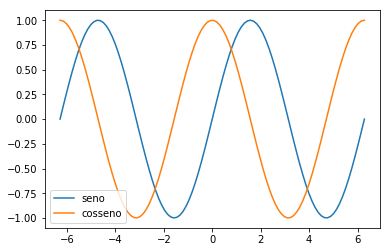

In [9]:
import numpy as np
from matplotlib import pyplot as plt

# dados para serem plotados
x = np.linspace(-2*np.pi,2*np.pi,100)
y = np.sin(x)
z = np.cos(x)

# plotando x e sin(x)
plt.plot(x, y, label='seno')
# plotando x e cos(x)
plt.plot(x, z, label='cosseno')
# pedindo para plotar a legenda no "melhor" lugar
plt.legend(loc='best')
# pedindo que o gráfico seja desnhado
plt.show()

A célula acima mostra o começo típico de um gráfico usando o matplotlib:
1. Organizamos os dados que serão plotados
2. Adicionamos cada curva
3. Pedimos elementos adicionais, como legendas, título, modificações nos eixos...
4. Pedimos que o gráfico seja mostrado ou salvamos ele no disco
Essa receita é o estilo matlab de fazer gráficos, e muita coisa pode ser feita com matplotlib sabendo isso e poucas outras funções para modificar os elementos do gráficos ou criar tipos de representação diferentes, como gráficos de barras ou gráficos em 2 e 3 dimensões.

Uma das melhores formas de se aprender a usar o matplotlib é através de exemplos, o próprio site do módulo disponibiliza [diversos exemplos com código e imagem](http://matplotlib.org/gallery.html).
Existe até uma [competição de gráficos em matplotlib](https://scipy2016.scipy.org/ehome/146062/332971/).

Para entender melhor como usar o matplotlib, vamos focar no método pythonico, isto é, seguindo os princípios de orientação à objeto.
Isso significa que uma figura é um objeto, os eixos de coordenadas dentro da figura são objetos, as curvas desenhadas são um objeto e por aí vai.
Comecemos criando uma figura:

In [31]:
# evita que eu tenha que digitar plt.show() e faz com que as figuras sejam
# mostradas no proprio notebook (caso contrário, é possível que uma janela 
# extra seja aberta para mostrar a figura)
%matplotlib inline

In [54]:
fig = plt.figure()
plt.show()

Note que a figura não tem nada dentro e, portanto, não tem o que mostrar. 
Vamos adicionar um sistema conjunto de eixos bidimensionais à figura, que é feito 
adicionando um subplot dentro da figura:

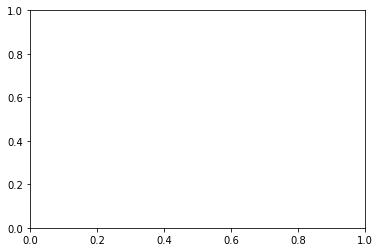

In [55]:
ax = fig.add_subplot(111)
fig

Note que, ao adicionarmo um subplot à figura, ganhamos uma referência ao subplot, à qual chamamos `ax`.
Com isso temos controle direto aos dois elementos principais da figura: a própria figura e o plot dentro dela.

Suponha que tenhamos um conjunto de dados bem simples para plotar.
Como o plot deve ser feito nos eixos, devemos usar a referência do subplot (que são os eixos) para isso:

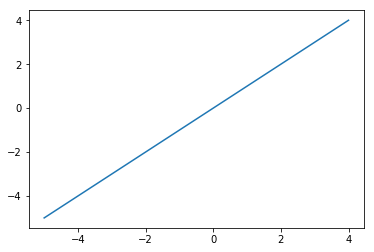

In [56]:
x = np.arange(-5,5)
(curve1,) = ax.plot(x, x)
fig

Novamente, ao pedir um novo elemento no gráfico, ganhamos uma referência ao elemento, neste caso a curva dos dados.
Note que os limites dos eixos foram ajustados automaticamente para conter toda a curva.

Digamos, agora, que não queremos o gráfico em forma de linha mas como pontos.
Podemos fazer isso da seguinte forma

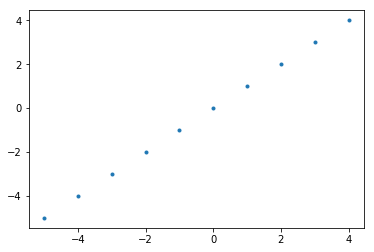

In [64]:
curve1.set_linestyle('')
curve1.set_marker('.')
fig

Perceba que agora, como não inserimos nenhum novo elemento no gráfico mas apenas mudamos propriedades de um elemento já existente, nenhuma nova referência é criada.

Esses são os princípios de como trabalhar com a ideia de orientação a obejto no matplotlib.
Vejamos como melhorar nosso primeiro gráfico.

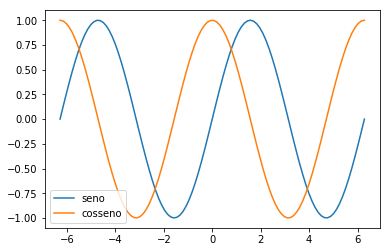

In [114]:
# esse comando simplifica a criação de plots, agregando alguns comandos vistos acima
fig, ax = plt.subplots() 

x = np.linspace(-2*np.pi, 2*np.pi,100)
y, z = np.sin(x), np.cos(x)
(c1,) = ax.plot(x, y, label='seno')
(c2,) = ax.plot(x, z, label='cosseno')
leg = ax.legend(loc='best')

Suponha que queiramos controlar o número de marcações nos eixos.
Para isso podemos usar os métodos adequado da referência aos eixos:

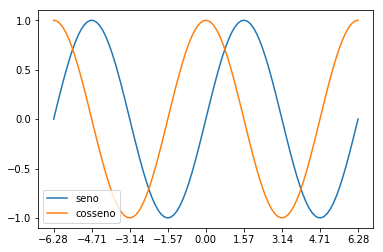

In [115]:
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_xticks([-2*np.pi,-3*np.pi/2,-np.pi,-np.pi/2,0,np.pi/2,np.pi,3*np.pi/2,2*np.pi])
fig

Uma característica muito útil do matplotlib é a capacidade de mostrar corretamente expressões matemáticas escritas em LaTex.
Vamos mudar a face dos marcadores do eixo x para múltiplos de π em LaTex:

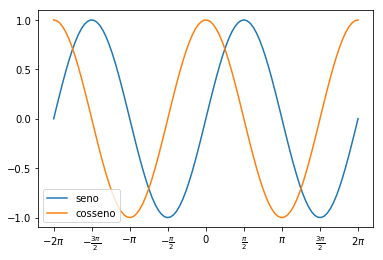

In [116]:
ax.set_xticklabels([r'$-2\pi$',r'$-\frac{3\pi}{2}$',r'$-\pi$',r'$-\frac{\pi}{2}$',0,r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$',r'$2\pi$'])
fig

Suponha agora, que não gostemos das bordas superior e direita do gráfico.
Podemos removê-las acessando os "spines" do eixo

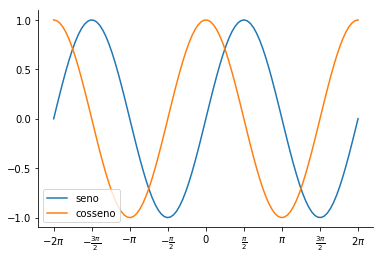

In [117]:
for s in ('right', 'top'):
    ax.spines[s].set_visible(False)
fig

Se quisermos mover legenda, podemos fazer:

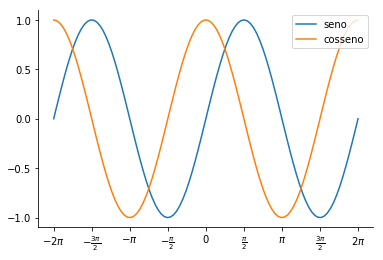

In [119]:
ax.legend(loc='upper right')
fig

E fim. Vamos salvar a figura

In [121]:
fig.savefig('sene-cosseno.svg')

## O que tentar agora

Há várias direções para brincar com o matplotlib:
- Outros tipos de gráicos unidimensionais:
  * ax.bar
  * ax.scatter 
- Gráficos bidimensionais e imagens:
  * ax.imshow
  * ax.pcolor
  * ax.pcolormesh
  * ax.quiver
  * ax.streamplot
- Gráficos tridimensionais:
  * ax.surface
- Pacotes temáticos:
  * cartopy
  
Sobre gráficos tridimensionais, é necessário usar a seguinte receita:

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')